In [2]:
!wget https://www.fjc.gov/sites/default/files/idb/textfiles/cv88on_0.zip --no-check-certificate
!unzip cv88on_0.zip

--2021-05-30 00:11:44--  https://www.fjc.gov/sites/default/files/idb/textfiles/cv88on_0.zip
Resolving www.fjc.gov (www.fjc.gov)... 199.83.132.98
Connecting to www.fjc.gov (www.fjc.gov)|199.83.132.98|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 278990576 (266M) [application/zip]
Saving to: ‘cv88on_0.zip’

cv88on_0.zip        100%[===================>] 266.07M  99.5MB/s    in 2.7s    

2021-05-30 00:11:47 (99.5 MB/s) - ‘cv88on_0.zip’ saved [278990576/278990576]

Archive:  cv88on_0.zip
  inflating: cv88on.txt              


In [1]:
!ls

cv88on_0.zip  cv88on.txt  sample_data


In [2]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 



In [3]:
def convert(val):
  if val == -8 or val == "-8":
    return np.nan
  return val

#conv_dict = {"":convert} converters=conv_dict

#req_col = []
#d_type=

to_drop = ["TITL","SECTION","FILEJUDG","FILEMAG","MDLDOCK","PLT","DEF","SUBSECT","DJOINED","PRETRIAL","TRIBEGAN","TRIALEND","TDATEUSE","FDATEUSE"]

df = pd.read_csv("cv88on.txt", sep='\t',encoding='cp1252').drop(to_drop,axis='columns')
df.head()

,CIRCUIT,DISTRICT,OFFICE,DOCKET,ORIGIN,FILEDATE,JURIS,NOS,RESIDENC,JURY,CLASSACT,DEMANDED,COUNTY,ARBIT,TRANSDAT,TRANSOFF,TRANSDOC,TRANSORG,TERMDATE,TRCLACT,TERMJUDG,TERMMAG,PROCPROG,DISP,NOJ,AMTREC,JUDGMENT,TRMARB,PROSE,IFP,STATUSCD,TAPEYEAR
0,0,90,1,7101462,4,07/21/1971,3,440,-8,-8,1,-8,0,-8,NaN,-8,-8,-8,11/17/1985,2,NaN,NaN,6,9,3,-8,1,-8,-8,NaN,NaN,1988
1,0,90,1,7300974,4,05/17/1973,2,890,-8,-8,-8,-8,0,-8,NaN,-8,-8,-8,04/18/1988,-8,NaN,NaN,4,17,1,518,1,-8,-8,NaN,NaN,1988
2,0,90,1,7601326,4,01/31/1985,2,440,-8,-8,-8,-8,0,-8,NaN,-8,-8,-8,03/21/1988,-8,NaN,NaN,10,13,-8,-8,-8,-8,-8,NaN,NaN,1988
3,0,90,1,7700081,3,09/19/1984,2,442,-8,-8,-8,-8,0,-8,NaN,-8,-8,-8,10/19/1985,-8,NaN,NaN,10,13,-8,-8,-8,-8,-8,NaN,NaN,1988
4,0,90,1,7901559,2,06/15/1979,2,550,-8,-8,-8,-8,0,-8,NaN,-8,-8,-8,12/10/1987,-8,NaN,NaN,12,6,0,-8,2,-8,-8,NaN,NaN,1988


In [4]:
df["NOS"].value_counts()

365    843087
550    723069
530    627768
190    547522
440    524916
        ...  
910        31
421        23
992        22
420        13
930         2
Name: NOS, Length: 113, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9222144 entries, 0 to 9222143
Data columns (total 32 columns):
 #   Column    Dtype  
---  ------    -----  
 0   CIRCUIT   int64  
 1   DISTRICT  object 
 2   OFFICE    object 
 3   DOCKET    int64  
 4   ORIGIN    int64  
 5   FILEDATE  object 
 6   JURIS     int64  
 7   NOS       int64  
 8   RESIDENC  int64  
 9   JURY      object 
 10  CLASSACT  int64  
 11  DEMANDED  int64  
 12  COUNTY    int64  
 13  ARBIT     object 
 14  TRANSDAT  object 
 15  TRANSOFF  object 
 16  TRANSDOC  int64  
 17  TRANSORG  object 
 18  TERMDATE  object 
 19  TRCLACT   int64  
 20  TERMJUDG  float64
 21  TERMMAG   float64
 22  PROCPROG  int64  
 23  DISP      int64  
 24  NOJ       int64  
 25  AMTREC    int64  
 26  JUDGMENT  int64  
 27  TRMARB    object 
 28  PROSE     int64  
 29  IFP       object 
 30  STATUSCD  object 
 31  TAPEYEAR  int64  
dtypes: float64(2), int64(18), object(12)
memory usage: 2.2+ GB
CIRCUIT       int64
DISTRICT     object
O

In [6]:
all_columns = df.columns

for i in range(0,len(all_columns)):
    (df[all_columns[i]]).replace("-8",np.nan,inplace=True)


for i in range(0,len(all_columns)):
    (df[all_columns[i]]).replace(-8,np.nan,inplace=True)

In [7]:
df.head()

,CIRCUIT,DISTRICT,OFFICE,DOCKET,ORIGIN,FILEDATE,JURIS,NOS,RESIDENC,JURY,CLASSACT,DEMANDED,COUNTY,ARBIT,TRANSDAT,TRANSOFF,TRANSDOC,TRANSORG,TERMDATE,TRCLACT,TERMJUDG,TERMMAG,PROCPROG,DISP,NOJ,AMTREC,JUDGMENT,TRMARB,PROSE,IFP,STATUSCD,TAPEYEAR
0,0,90,1,7101462,4.0,07/21/1971,3.0,440,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,11/17/1985,2.0,NaN,NaN,6.0,9.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,1988
1,0,90,1,7300974,4.0,05/17/1973,2.0,890,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,04/18/1988,NaN,NaN,NaN,4.0,17.0,1.0,518.0,1.0,NaN,NaN,NaN,NaN,1988
2,0,90,1,7601326,4.0,01/31/1985,2.0,440,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,03/21/1988,NaN,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988
3,0,90,1,7700081,3.0,09/19/1984,2.0,442,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,10/19/1985,NaN,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988
4,0,90,1,7901559,2.0,06/15/1979,2.0,550,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,12/10/1987,NaN,NaN,NaN,12.0,6.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,1988


In [8]:
df["JUDGMENT"].replace(4,np.nan,inplace=True)
df["JUDGMENT"].replace(0,np.nan,inplace=True)

#df.drop(df[df["JUDGMENT"] == 4].index ,inplace=True)
#df.drop(df[df["JUDGMENT"] == 0].index ,inplace=True)
df["JUDGMENT"]=df["JUDGMENT"]*10
df["LABEL"] = df["NOJ"] + df["JUDGMENT"]
df.head()

,CIRCUIT,DISTRICT,OFFICE,DOCKET,ORIGIN,FILEDATE,JURIS,NOS,RESIDENC,JURY,CLASSACT,DEMANDED,COUNTY,ARBIT,TRANSDAT,TRANSOFF,TRANSDOC,TRANSORG,TERMDATE,TRCLACT,TERMJUDG,TERMMAG,PROCPROG,DISP,NOJ,AMTREC,JUDGMENT,TRMARB,PROSE,IFP,STATUSCD,TAPEYEAR,LABEL
0,0,90,1,7101462,4.0,07/21/1971,3.0,440,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,11/17/1985,2.0,NaN,NaN,6.0,9.0,3.0,NaN,10.0,NaN,NaN,NaN,NaN,1988,13.0
1,0,90,1,7300974,4.0,05/17/1973,2.0,890,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,04/18/1988,NaN,NaN,NaN,4.0,17.0,1.0,518.0,10.0,NaN,NaN,NaN,NaN,1988,11.0
2,0,90,1,7601326,4.0,01/31/1985,2.0,440,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,03/21/1988,NaN,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,NaN
3,0,90,1,7700081,3.0,09/19/1984,2.0,442,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,10/19/1985,NaN,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,NaN
4,0,90,1,7901559,2.0,06/15/1979,2.0,550,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,12/10/1987,NaN,NaN,NaN,12.0,6.0,0.0,NaN,20.0,NaN,NaN,NaN,NaN,1988,20.0


In [9]:
df["TERMDATE"]= pd.to_datetime(df["TERMDATE"])
df["FILEDATE"]= pd.to_datetime(df["FILEDATE"])
df["CASEDAYS"] = (df["TERMDATE"]-df["FILEDATE"]).dt.days
df.head()

,CIRCUIT,DISTRICT,OFFICE,DOCKET,ORIGIN,FILEDATE,JURIS,NOS,RESIDENC,JURY,CLASSACT,DEMANDED,COUNTY,ARBIT,TRANSDAT,TRANSOFF,TRANSDOC,TRANSORG,TERMDATE,TRCLACT,TERMJUDG,TERMMAG,PROCPROG,DISP,NOJ,AMTREC,JUDGMENT,TRMARB,PROSE,IFP,STATUSCD,TAPEYEAR,LABEL,CASEDAYS
0,0,90,1,7101462,4.0,1971-07-21,3.0,440,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,1985-11-17,2.0,NaN,NaN,6.0,9.0,3.0,NaN,10.0,NaN,NaN,NaN,NaN,1988,13.0,5233.0
1,0,90,1,7300974,4.0,1973-05-17,2.0,890,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1988-04-18,NaN,NaN,NaN,4.0,17.0,1.0,518.0,10.0,NaN,NaN,NaN,NaN,1988,11.0,5450.0
2,0,90,1,7601326,4.0,1985-01-31,2.0,440,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1988-03-21,NaN,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,NaN,1145.0
3,0,90,1,7700081,3.0,1984-09-19,2.0,442,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1985-10-19,NaN,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,NaN,395.0
4,0,90,1,7901559,2.0,1979-06-15,2.0,550,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-12-10,NaN,NaN,NaN,12.0,6.0,0.0,NaN,20.0,NaN,NaN,NaN,NaN,1988,20.0,3100.0


In [10]:
missing_value_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_value_count.sum()
percentage_missing = (total_missing/total_cells)*100
print("Missing Values Count:")
print(missing_value_count)
print("Percentage of missing data:",percentage_missing)

Missing Values Count:
CIRCUIT           0
DISTRICT          0
OFFICE            0
DOCKET            0
ORIGIN          550
FILEDATE          0
JURIS             1
NOS               0
RESIDENC    6511026
JURY        5132105
CLASSACT    9082443
DEMANDED     411258
COUNTY            0
ARBIT       8912329
TRANSDAT    9140825
TRANSOFF    9123116
TRANSDOC    9117462
TRANSORG    8999142
TERMDATE          6
TRCLACT     9133262
TERMJUDG    9222144
TERMMAG     9222144
PROCPROG     578117
DISP         578117
NOJ         4666897
AMTREC      1115570
JUDGMENT    7236686
TRMARB      9035709
PROSE       2170918
IFP         8369953
STATUSCD    3183081
TAPEYEAR          0
LABEL       7242691
CASEDAYS          6
dtype: int64
Percentage of missing data: 44.07089194928054


In [11]:
df.dropna(subset=["LABEL","ORIGIN"],inplace=True)
threshold = len(df)*0.80
print("Old Shape:",df.shape)
df.dropna(axis=1,thresh=threshold,inplace=True)
print("New Shape:",df.shape)

Old Shape: (1979238, 34)
New Shape: (1979238, 19)


In [12]:
df.head()

,CIRCUIT,DISTRICT,OFFICE,DOCKET,ORIGIN,FILEDATE,JURIS,NOS,DEMANDED,COUNTY,TERMDATE,PROCPROG,DISP,NOJ,AMTREC,JUDGMENT,TAPEYEAR,LABEL,CASEDAYS
0,0,90,1,7101462,4.0,1971-07-21,3.0,440,NaN,0,1985-11-17,6.0,9.0,3.0,NaN,10.0,1988,13.0,5233.0
1,0,90,1,7300974,4.0,1973-05-17,2.0,890,NaN,0,1988-04-18,4.0,17.0,1.0,518.0,10.0,1988,11.0,5450.0
4,0,90,1,7901559,2.0,1979-06-15,2.0,550,NaN,0,1987-12-10,12.0,6.0,0.0,NaN,20.0,1988,20.0,3100.0
5,0,90,1,7902405,1.0,1979-09-10,2.0,442,NaN,0,1988-04-08,8.0,9.0,0.0,NaN,20.0,1988,20.0,3133.0
8,0,90,1,8001844,4.0,1988-03-01,2.0,440,0.0,99999,1988-04-26,4.0,6.0,0.0,0.0,20.0,1988,20.0,56.0


In [9]:
#to_drop = ["TITL","SECTION","FILEJUDG","FILEMAG","MDLDOCK","PLT","DEF","SUBSECT","DJOINED","PRETRIAL","TRIBEGAN","TRIALEND","AMTREC","TDATEUSE","FDATEUSE"]
#print(to_drop)
#print(to_drop[0])
#for i in range(0,len(to_drop)):
#    df.drop(to_drop[i],axis=1,inplace=True)

#df.drop(["TITL","SECTION","FILEJUDG","FILEMAG","MDLDOCK","PLT","DEF","SUBSECT","DJOINED","PRETRIAL","TRIBEGAN","TRIALEND","AMTREC","TDATEUSE","FDATEUSE"],axis=1,inplace=True)
#df.isnull().any()

KeyError: ignored

In [12]:
missing_value_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_value_count.sum()
percentage_missing = (total_missing/total_cells)*100
print("Missing Values Count:")
print(missing_value_count)
print("Percentage of missing data:",percentage_missing)
df.tail()


Missing Values Count:
CIRCUIT          0
DISTRICT         0
OFFICE           0
DOCKET           0
ORIGIN           0
FILEDATE         0
JURIS            0
NOS              0
DEMANDED    130061
COUNTY           0
TERMDATE         0
PROCPROG         0
DISP             0
NOJ              0
AMTREC      112310
JUDGMENT         0
TAPEYEAR         0
LABEL            0
CASEDAYS         0
dtype: int64
Percentage of missing data: 0.6445090697052417


,CIRCUIT,DISTRICT,OFFICE,DOCKET,ORIGIN,FILEDATE,JURIS,NOS,DEMANDED,COUNTY,TERMDATE,PROCPROG,DISP,NOJ,AMTREC,JUDGMENT,TAPEYEAR,LABEL,CASEDAYS
9221609,11,3J,4,2000147,1.0,2020-07-06,3.0,446,0.0,13051,2020-10-07,10.0,17.0,0.0,0.0,30.0,2021,30.0,93.0
9221620,11,3J,4,2000159,1.0,2020-07-20,4.0,140,531.0,13051,2020-11-17,1.0,5.0,2.0,540.0,10.0,2021,12.0,120.0
9221788,11,3J,5,1500065,1.0,2015-08-17,3.0,555,0.0,13299,2020-12-17,10.0,17.0,0.0,0.0,20.0,2021,20.0,1949.0
9222063,11,3J,6,2000035,1.0,2020-04-07,2.0,510,0.0,13031,2020-10-28,10.0,17.0,0.0,0.0,20.0,2021,20.0,204.0
9222100,11,3J,6,2000079,1.0,2020-08-17,3.0,370,75.0,13031,2020-12-30,1.0,5.0,3.0,0.0,10.0,2021,13.0,135.0


In [13]:
#Data type modification
df["DISTRICT"] = df["DISTRICT"].astype(str)
df["DISTRICT"].replace("3A","30",inplace=True)
df["DISTRICT"].replace("3C","31",inplace=True)
df["DISTRICT"].replace("3E","32",inplace=True)
df["DISTRICT"].replace("3G","33",inplace=True)
df["DISTRICT"].replace("3J","34",inplace=True)
df["DISTRICT"].replace("3L","35",inplace=True)
df["DISTRICT"].replace("3N","96",inplace=True)
df["DISTRICT"].replace("7","95",inplace=True)

In [12]:
df["PROSE"].fillna(0,inplace=True)
df["PROSE"].value_counts()

0.0    3169527
1.0     954497
2.0      90475
3.0      15640
Name: PROSE, dtype: int64

In [13]:
df["STATUSCD"].fillna("L",inplace=True)
df["STATUSCD"].value_counts()

L    4230139
Name: STATUSCD, dtype: int64

In [14]:
df["DEMANDED"].fillna(0,inplace=True)
df["DEMANDED"].value_counts()

df["AMTREC"].fillna(0,inplace=True)
df["AMTREC"].value_counts()

0.0       1540579
1.0         32848
9999.0      27608
2.0         20931
3.0         18507
           ...   
4138.0          1
4135.0          1
4133.0          1
4132.0          1
3144.0          1
Name: AMTREC, Length: 6941, dtype: int64

In [15]:
df["JURY"].fillna("N",inplace=True)
df["JURY"].value_counts()

N    2680549
P    1071010
B     314856
D     159877
Y       2234
J        994
X        394
T        116
1         21
U         15
9         10
0          9
M          7
8          7
3          6
5          6
2          4
F          4
6          3
K          3
I          3
S          2
H          2
4          1
L          1
O          1
A          1
R          1
Q          1
C          1
Name: JURY, dtype: int64

In [15]:
print("Unique values of target variable :-", df['LABEL'].unique())

Unique values of target variable :- [13. 11. 20. 10. 14. 21. 30. 23. 15. 31. 24. 12. 22. 35. 34. 16. 25. 32.
 33. 36. 26.]


In [15]:
df["LABEL"].value_counts()

20.0    1110857
11.0     300130
10.0     206726
12.0     112473
14.0      81931
30.0      46397
25.0      42730
13.0      17681
21.0      13380
15.0      11927
16.0       7988
24.0       5261
31.0       4614
22.0       4426
34.0       3200
26.0       2937
32.0       2547
33.0       1172
23.0       1145
35.0       1045
36.0        671
Name: LABEL, dtype: int64

In [16]:
print("Unique values of target variable :-", df['DISTRICT'].unique())

Unique values of target variable :- ['90' '0' '1' '2' '3' '4' '5' '6' '95' '8' '9' '10' '11' '12' '13' '14'
 '15' '91' '16' '17' '18' '19' '20' '22' '23' '24' '25' '35' '96' '36'
 '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50'
 '51' '52' '53' '54' '55' '56' '57' '58' '60' '61' '62' '63' '64' '65'
 '66' '67' '68' '69' '7-' '70' '71' '72' '73' '74' '75' '76' '77' '78'
 '79' '80' '81' '93' '94' '82' '83' '84' '85' '86' '87' '88' '89' '26'
 '27' '28' '29' '30' '31' '32' '33' '34' '02' '05' '00' '01' '08' '09'
 '04' '03' '06' '07']


In [20]:
print("Number of sample under each target value :- \n",df['LABEL'].value_counts())

Number of sample under each target value :- 
 20.0    1110857
11.0     300130
10.0     206726
12.0     112473
14.0      81931
30.0      46397
25.0      42730
13.0      17681
21.0      13380
15.0      11927
16.0       7988
24.0       5261
31.0       4614
22.0       4426
34.0       3200
26.0       2937
32.0       2547
33.0       1172
23.0       1145
35.0       1045
36.0        671
Name: LABEL, dtype: int64


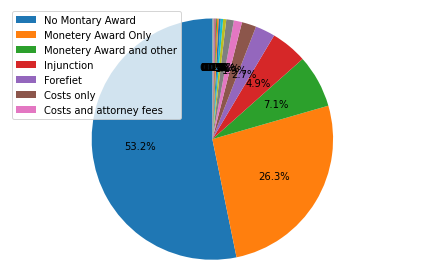

In [18]:
noj_labels = 'No Montary Award','Monetery Award Only','Monetery Award and other','Injunction','Forefiet','Costs only','Costs and attorney fees'
#colours = ['silver']
plt.pie(df["LABEL"].value_counts(),startangle=90,autopct='%.1f%%')
plt.legend(noj_labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [21]:
val = df["LABEL"].value_counts()
print(val)

20.0    1110857
11.0     300130
10.0     206726
12.0     112473
14.0      81931
30.0      46397
25.0      42730
13.0      17681
21.0      13380
15.0      11927
16.0       7988
24.0       5261
31.0       4614
22.0       4426
34.0       3200
26.0       2937
32.0       2547
33.0       1172
23.0       1145
35.0       1045
36.0        671
Name: LABEL, dtype: int64


TypeError: ignored

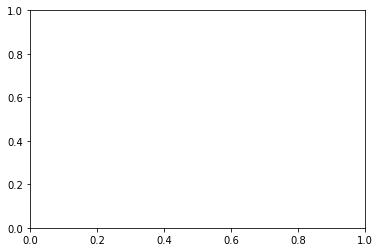

In [40]:
fig, ax = plt.subplots()

size = 1
vals = df["LABEL"]

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 3,4,5, 6, 7,8,9, 10])

inner_vals = []

for index,value in df["LABEL"].value_counts():
  if index <= 10:
    inner_vals[0]+=value
  if index > 10 and index < 20:
    inner_vals[1]+=value_counts
return inner_vals

ax.pie(vals.value_counts(), radius=2.5, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

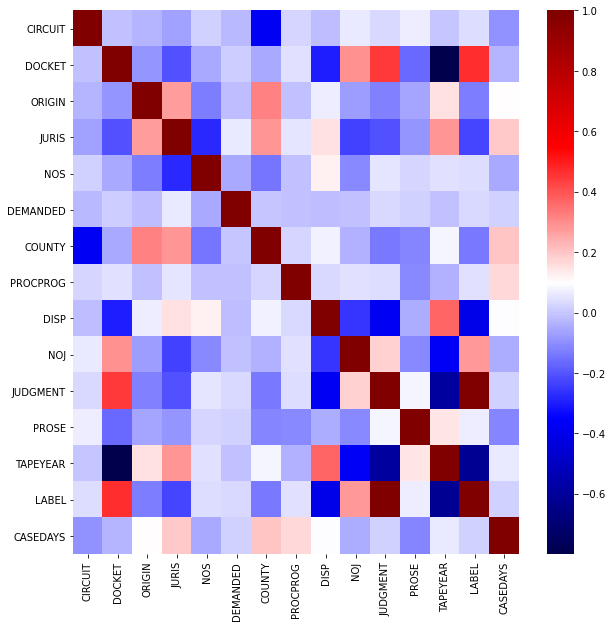

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show()

Highest Correlation:
PRO SE vs DOCKET
PRO SE vs TAPEYEAR


In [17]:
df.to_csv("Output.csv", index=False, header=True)

In [18]:
from google.colab import files
files.download("Output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
df.isnull().sum()

NameError: ignored

In [29]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

2707288 train examples
676823 validation examples
846028 test examples


In [ ]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
model = get_compiled_model()
model.fit(train, epochs=5)